Loading libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
pd.set_option('display.max_colwidth', None)

Mounting Drive

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


Defining Paths

In [8]:
path = "/content/drive/MyDrive/Final_Dataset_Sample/Diseased_and_Non_Diseased_Datasets/Healthy_dataset/Segmented"
#path = os.path.join(path,"PR_data")
#path = os.path.join(path,"leaves")

Visualizing Original Dataset

  0%|          | 0/1265 [00:00<?, ?it/s]

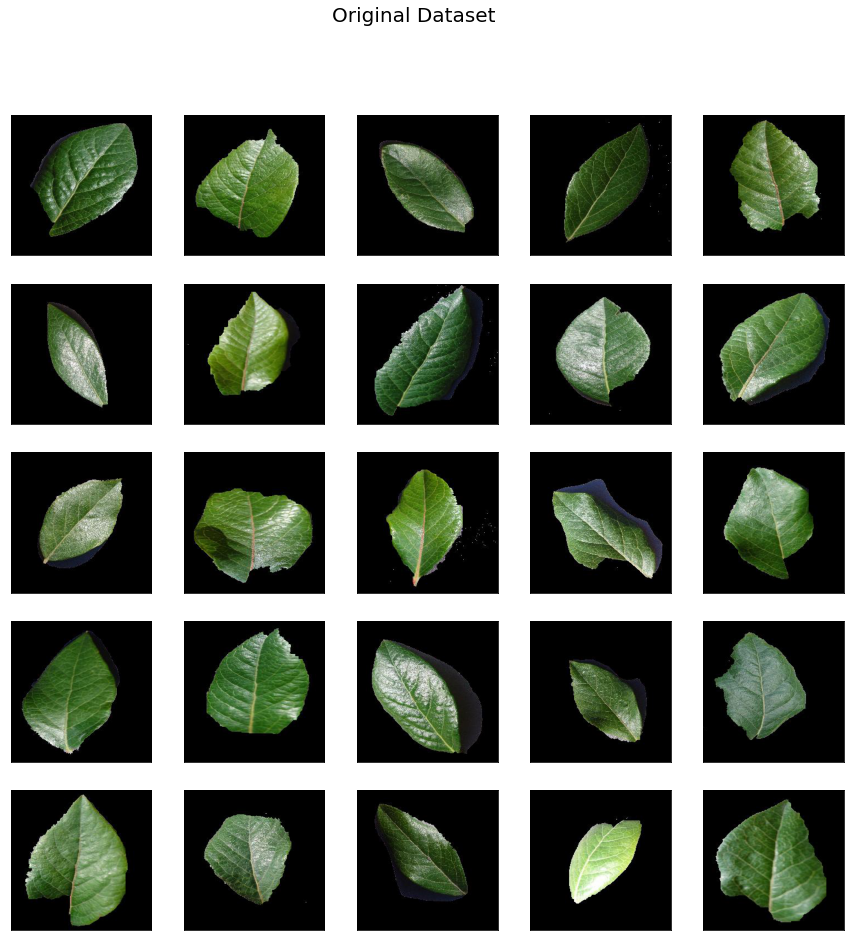

In [9]:
img_arr_org = []

for files in tqdm(glob.glob(os.path.join(path,"*.JPG"))):
  img = Image.open(files)
  img_arr_org.append(np.asarray(img))

plt.figure(figsize=(15,15))
for i, img in enumerate(img_arr_org[0:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("Original Dataset", fontsize=20)
plt.show()

Dataset Augmentation

In [10]:
img_arr = []
for files in tqdm(glob.glob(os.path.join(path,"*.JPG"))):
  img = Image.open(files)
  #img_arr.append(np.asarray(img))
  img= ImageEnhance.Contrast(img).enhance(1.5)
  img= ImageEnhance.Brightness(img).enhance( 1.5)
  img= ImageEnhance.Color(img).enhance(1.5)
  img= ImageEnhance.Sharpness(img).enhance(1.5)
  img_arr.append(np.asarray(img))
 
  
  # x = random.randint(0,100)
  # if x>=50:
  #   img2 = ImageEnhance.Contrast(img).enhance(random.choice([0.5, 1.5, 2.5, 3.5, 4]))
  #   img_arr.append(np.asarray(img2))
  # x = random.randint(0,100)
  # if x>=50:
  #   img2 = ImageEnhance.Brightness(img).enhance(random.choice([0.5, 1.5, 2.5, 3.5, 4]))
  #   img_arr.append(np.asarray(img2))
  # x = random.randint(0,100)
  # if x>=50:
  #   img2 = ImageEnhance.Color(img).enhance(random.choice([0.5, 1.5, 2.5, 3.5, 4]))
  #   img_arr.append(np.asarray(img2))
  # x = random.randint(0,100)
  # if x>=50:
  #   img2 = ImageEnhance.Sharpness(img).enhance(random.choice([0.5, 1.5, 2.5, 3.5, 4]))
  #   img_arr.append(np.asarray(img2))
  # x = random.randint(0,100)
  # if x>=50:
  #   img2 = img.rotate(random.choice([0, 90, 180, 270]), Image.NEAREST, expand = 1)#  ImageEnhance.Rotate(img).enhance(random.choice([0, 90, 180, 270]))
  #   img_arr.append(np.asarray(img2))
  

  0%|          | 0/1265 [00:00<?, ?it/s]

Visualizing Augmented dataset

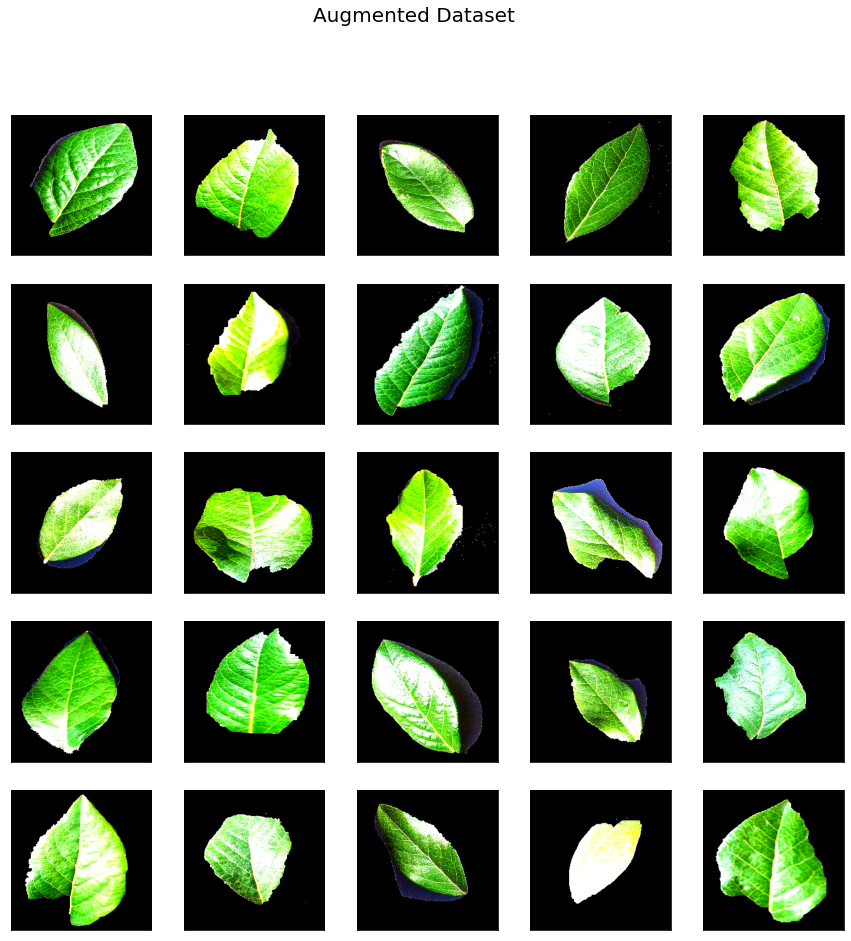

In [11]:
plt.figure(figsize=(15,15))
for i, img in enumerate(img_arr[0:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("Augmented Dataset", fontsize=20)
plt.show()

In [12]:
from skimage.io import imsave
for i, img in enumerate(img_arr):
  imsave('/content/drive/MyDrive/Final_Dataset_Sample/Diseased_and_Non_Diseased_Datasets/Healthy_dataset/Canny/'+str(i+1)+'.JPG',img)

Grayscaling Images

In [ ]:
gray = np.array([cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) for img in tqdm(img_arr)])
gray.shape

  0%|          | 0/1502 [00:00<?, ?it/s]

(1502, 256, 256)

Visualizing Grayscaled Dataset

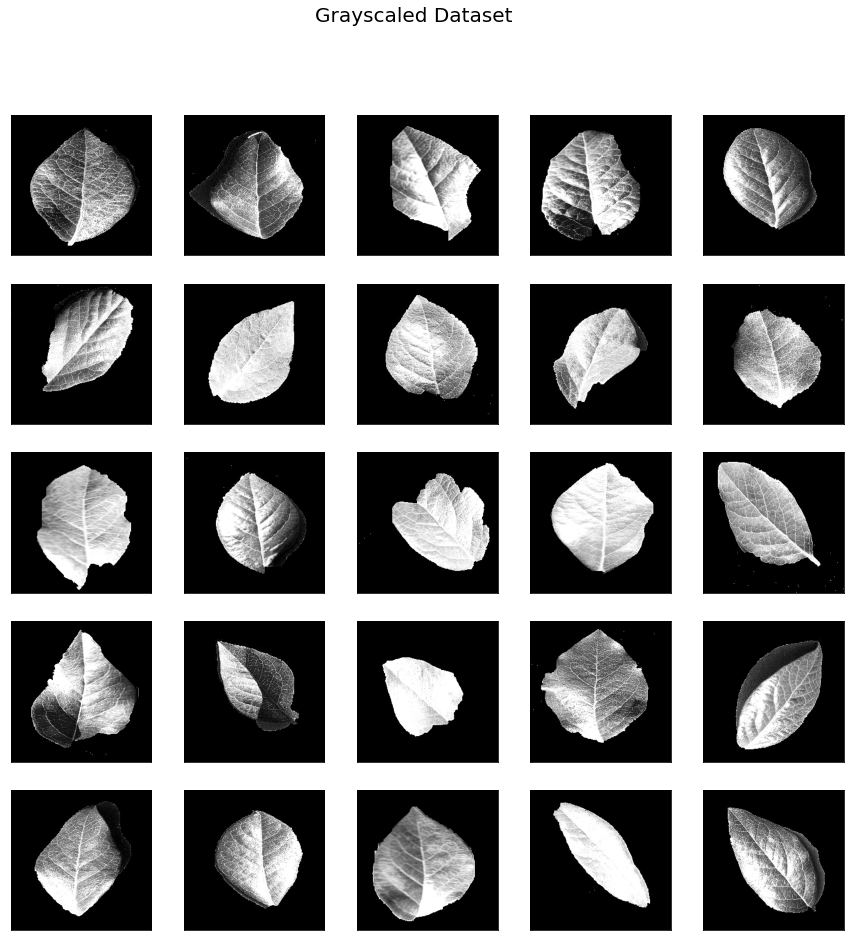

In [ ]:
plt.figure(figsize=(15,15))
for i, img in enumerate(gray[25:50]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.suptitle("Grayscaled Dataset", fontsize=20)
plt.show()

In [ ]:
from skimage.io import imsave
for i, grayimg in enumerate(gray):
  imsave('/content/drive/MyDrive/Segmented_images/Canny_image/Cedar_apple_rust_segmented/'+str(i+1)+'.JPG',grayimg)

Thresholding (for improved contrast)

In [ ]:
thresh = [cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1] for img in tqdm(gray)]

  0%|          | 0/630 [00:00<?, ?it/s]

Visualizing Contrast Boosted Dataset

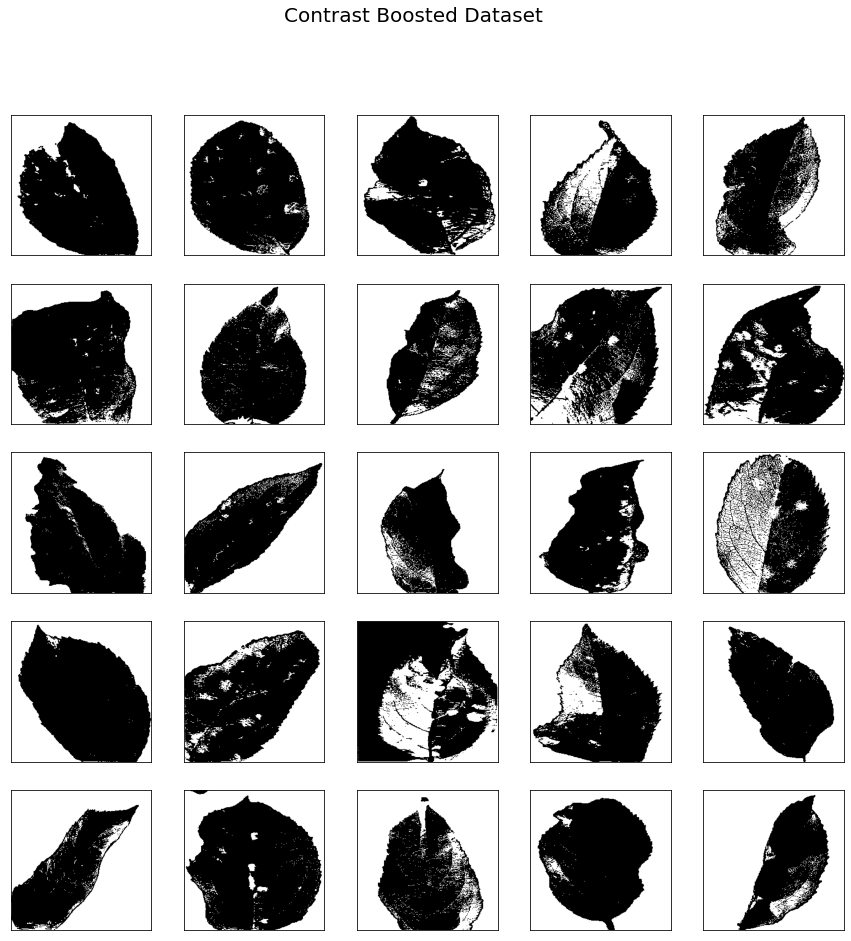

In [ ]:
plt.figure(figsize=(15,15))
for i, img in enumerate(thresh[0:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.suptitle("Contrast Boosted Dataset", fontsize=20)
plt.show()

Edge Detection and Segmenting mask

In [ ]:
edges = [cv2.dilate(cv2.Canny(img, 0, 255), None) for img in tqdm(thresh)]
masked = []
segmented = []
for i, img in tqdm(enumerate(edges)):
    cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv2.bitwise_and(img_arr[i], img_arr[i], mask=mask)
    segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

  0%|          | 0/50 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Visualizing Segmented Masks

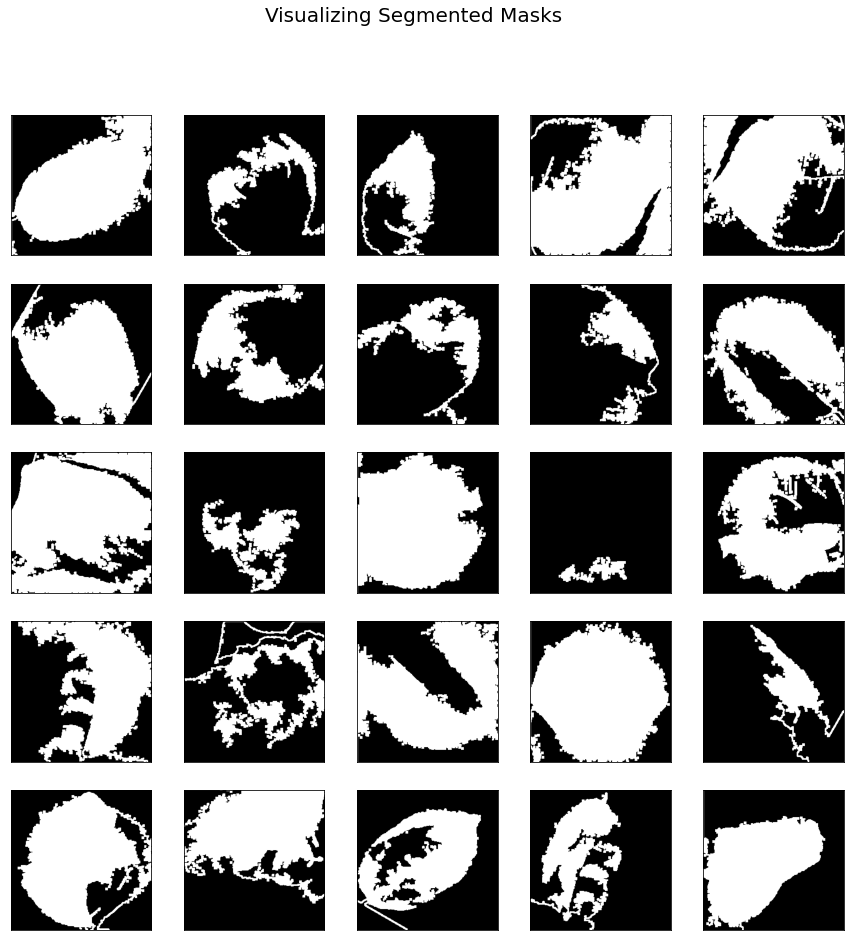

In [ ]:
plt.figure(figsize=(15,15))
for i, segimg in enumerate(masked[0:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
    plt.suptitle("Visualizing Segmented Masks", fontsize=20)
plt.show()

Visualizing Results

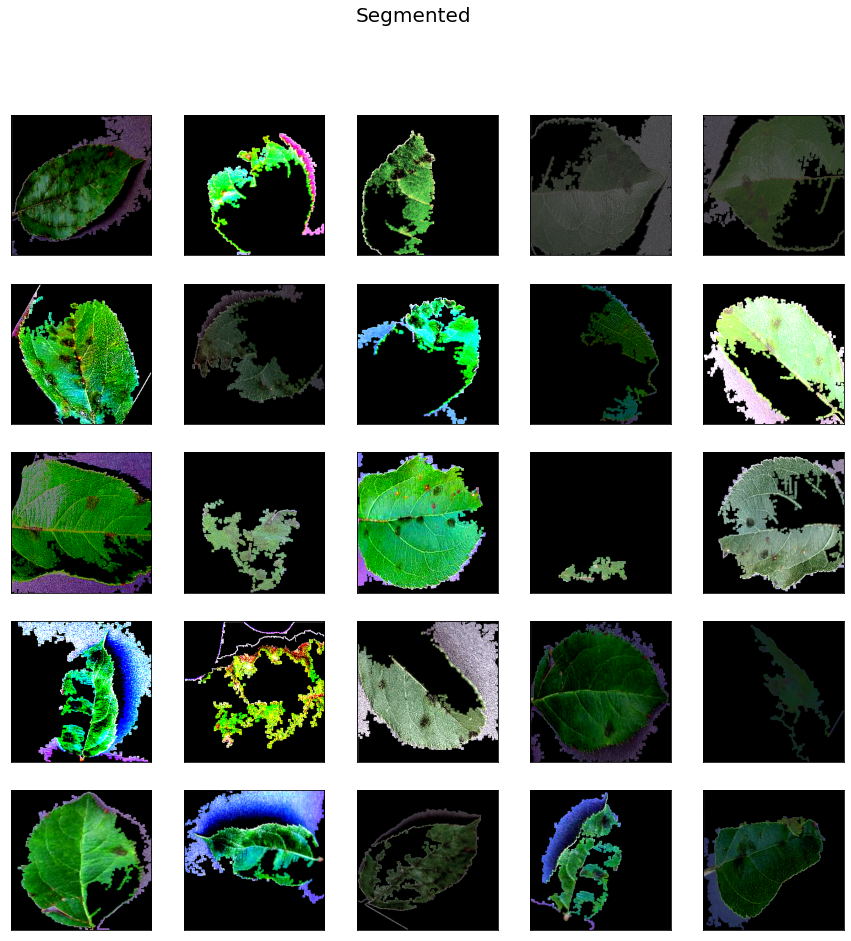

In [ ]:
plt.figure(figsize=(15,15))
for i, segimg in enumerate(segmented[0:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
    plt.suptitle("Segmented", fontsize=20)
plt.show()

In [ ]:
from skimage.io import imsave
for i, segimg in enumerate(segmented):
  imsave('/content/drive/MyDrive/Segmented_images/Canny_image/Apple_scab_segmented/'+str(i+1)+'.JPG',segimg)